### Get distribution of the number of k-mer preserving shuffles for a fixed alphabet size, varying the string length and k

In [1]:
import sequenceshuffles as seqs
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 300

In [2]:
## get data
# get distribution of k-mer shuffles vs. changing string length
n_max = 30 # max string length
k_list = [1,2,3] # k values
num_trials = 1000 # number of trials per string length and k value

sizes_by_k = {}
for k in k_list:
    sizes_by_k[k] = {}
    n_list = range(k,n_max+1)
    for n in n_list:
        sizes = []
        for trial_num in range(num_trials):
            # generate trajectory
            x = ''.join(np.random.choice(['a','c','g','t']) for _ in range(n))
            # count Markov types
            sizes.append(seqs.num_shuffles_from_string(x, k))
        sizes_by_k[k][n] = sizes[:]

(0, 30)

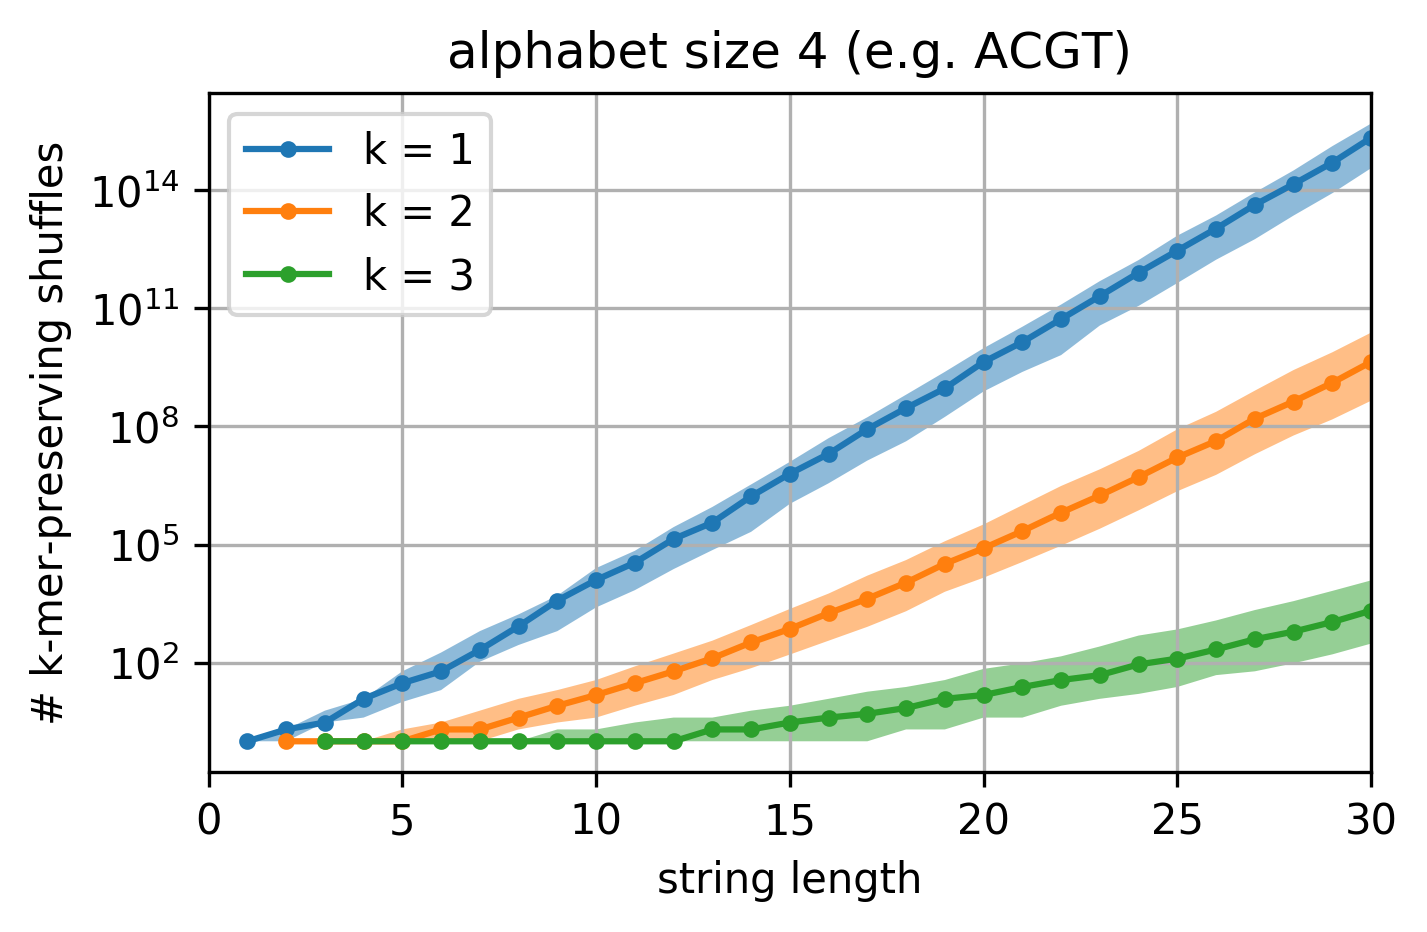

In [6]:
## plot
upper_percentile = 90
lower_percentile = 10

plt.figure(figsize=(5,3))

for k in k_list:
    n_list, sizes = zip(*list(sizes_by_k[k].items()))
    
    medians = [np.percentile(x,50) for x in sizes]
    upper = [np.percentile(x,upper_percentile) for x in sizes]
    lower = [np.percentile(x,lower_percentile) for x in sizes]
    
    plt.plot(n_list,medians,'.-', label='k = '+str(k))
    plt.fill_between(n_list,lower,upper,alpha=0.5)
    
    
plt.legend()
plt.gca().set_yscale('log')
plt.xlabel('string length')
plt.ylabel('# k-mer-preserving shuffles')
plt.grid()
plt.title('alphabet size 4 (e.g. ACGT)')

plt.xlim(0,30)